# First let's import, then look for the assignment below

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_cl

In [2]:
odd0Even1 = md2mc('''
DFA

!! DFA that accepts so long as the string seen so far 
!! has odd0s and even1s (in any order)

!! State design: I'll tag along letters "EO, OE, etc."
!! to indicate parity of 0's and 1's

I_EE : 0 -> F_OE
I_EE : 1 -> S_EO

S_EO : 0 -> S_OO
S_EO : 1 -> I_EE

F_OE : 0 -> I_EE
F_OE : 1 -> S_OO

S_OO : 0 -> S_EO
S_OO : 1 -> F_OE

''')

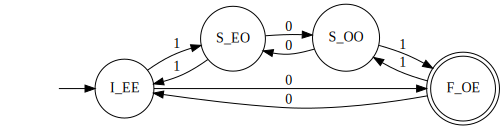

In [3]:
dotObj_dfa(odd0Even1)

In [4]:
# Now arrive at this via DFA intersection

Odd0 = md2mc('''
DFA
I : 1 -> I
I : 0 -> F

F : 1 -> F
F : 0 -> I
''')

Even1 = md2mc('''
DFA
IF : 0 -> IF
IF : 1 -> S

S : 0 -> S
S : 1 -> IF
''')

Odd0_and_Even1 = intersect_dfa(Odd0, Even1)

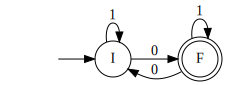

In [5]:
dotObj_dfa(Odd0)

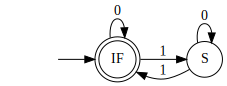

In [6]:
dotObj_dfa(Even1)

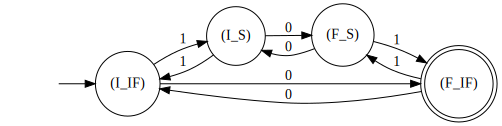

In [7]:
dotObj_dfa(Odd0_and_Even1)

# Now do the union of Odd0 and Even1
## Then try DeMorgan's law

In [8]:
# Union algo
# DeMorgan's law

# DFA for the unit language
## how many states?

In [9]:
Odd0FbyEven1 = md2mc('''
DFA

!! DFA that accepts so long as the string seen so far 
!! has odd0s and even1s (in THAT order)

!! State design: Must close-off 0's after seeing a 1
!! I'll denote this by adding a 'd' for the 0 position
!! So S_EE, Sd_EE, Fd_EE etc, where the 'd' says 0's are unwelcome

I_EE : 0 -> F_OE
I_EE : 1 -> Sd_EO

Sd_EO : 0 -> BH
Sd_EO : 1 -> Sd_EE

F_OE : 0 -> I_EE
F_OE : 1 -> Sd_OO

Sd_OO : 0 -> BH
Sd_OO : 1 -> Fd_OE

Sd_EE : 0 -> BH
Sd_EE : 1 -> Sd_EO

Fd_OE : 0 -> BH
Fd_OE : 1 -> Sd_OO

BH  : 0|1 -> BH
''')

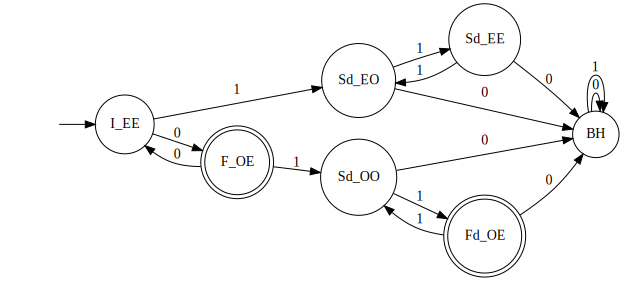

In [10]:
dotObj_dfa_w_bh(Odd0FbyEven1)

# Can express the language of this DFA as

$\{ 0^n \;:\; odd(n)\} \; \{ 1^n \;:\; even(n)\}$ 

# END